In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

%matplotlib inline
sns.set()

In [156]:
df = pd.read_excel('Выборка_ектб.xlsx', sheet_name = 0)
#df

In [157]:
df = df[df['Мусор'] == 0]
df = df[df['Выбросы'] == 0]
df = df[df['dup_res'] == 0]
df = df[df['Многоуровневость'] == 0]
df.reset_index(drop = True , inplace = True )
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,7.357429e+06,7.315261e+06,-315260.780670,-0.045037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3_этажи,0,этажи,15.274126,4300000,4500000,4.955072e+06,4.923574e+06,-623574.436842,-0.145017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6_этажи,0,этажи,15.483217,5300000,0,6.115291e+06,6.056768e+06,-756768.110306,-0.142786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7_этажи,0,этажи,15.679591,6450000,6490000,6.246966e+06,6.173033e+06,276967.222331,0.042941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15_этажи,0,этажи,15.823725,7450000,7500000,7.502204e+06,7.472315e+06,-22315.213466,-0.002995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7909,8464_авито,0,авито,15.293700,4385000,0,5.291969e+06,5.297718e+06,-912718.329665,-0.208146,...,NaN,NaN,NaN,NaN,NaN,ЖК «Миллениум»,"Дом 5 (секц. А, Б)",другое,Сдан 2 кв. 2017,NaN
7910,8467_авито,0,авито,15.147877,3790000,0,NaN,4.253817e+06,-463816.720736,-0.122379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7911,8468_авито,0,авито,15.054464,3452000,0,NaN,3.777030e+06,-325030.387942,-0.094157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7912,8469_авито,0,авито,15.176487,3900000,0,NaN,3.866094e+06,33905.795052,0.008694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
list(df.columns)

['ID',
 'Мусор',
 'Агрегатор',
 'LN(Цена)',
 'Цена',
 'Цена_перв',
 'Прогноз_1',
 'Прогноз_2',
 'MAE',
 'MAPE',
 'Цена(кв.м)_пр',
 'Анализ',
 'Исп',
 'Комм',
 'Цена(кв.м)',
 'Выбросы',
 'Выбросы_1',
 'Исп.1',
 'Комм.1',
 'Выбросы_2',
 'Исп.2',
 'Комм.2',
 'IsolationForest',
 'pca',
 'COPOD',
 'dup_all',
 'dup_1',
 'dup_2',
 'Пересечения',
 'dup(<=0.03)',
 'Пересечения(<=0.03)',
 'Пересечения(>0.03)',
 'dup_res',
 'ОПлощадь',
 'Оплощадь_перв',
 'Комнатность',
 'Комнатность_перв',
 'Этаж_1',
 'Этаж_2',
 'Этаж_3',
 'Этаж_4',
 'Этаж/Этажность',
 'Этажность_1',
 'Этажность_2',
 'Неточности',
 'Переменная этажность',
 'Р',
 'Р%',
 'Минжкх',
 'П',
 'Правдом',
 'П.1',
 'Этажность_перв',
 'ГП',
 'Неточности.1',
 'Р.1',
 'Минжкх.1',
 'Правдом.1',
 'Год постройки',
 'Аварийные',
 'Исп.3',
 'Ремонт_1',
 'Ремонт_перв',
 'Санузел',
 'Стены_1',
 'Стены_перв',
 'Адрес_перв',
 'Адрес',
 'Проверка номера дома',
 'Дом',
 'Дом_Ya',
 'Проверка',
 'Адрес_yandex',
 'Долгота',
 'Широта',
 'Сцепка_к',
 'Сцепка

In [159]:
df_1 = df[['Цена(кв.м)', 'ОПлощадь', 'Этаж_4', 'Этажность_1', 'ГП', 'Раст_центр_2', 'Раст_метро_2', 'Районы_2', 'ЖК_БД']]
df_1

,Цена(кв.м),ОПлощадь,Этаж_4,Этажность_1,ГП,Раст_центр_2,Раст_метро_2,Районы_2,ЖК_БД
0,99573.257468,70.30,этажи_2-5,26,2009.0,от_5000_до_10000,на_удалении,Академический,нет
1,106435.643564,40.40,этажи_2-5,5,1960.0,от_1500_до_5000,на_удалении,Центральный,нет
2,124941.065535,42.42,этажи_11-25,15,2012.0,от_1500_до_5000,на_удалении,Пионерский,нет
3,113556.338028,56.80,этажи_2-5,9,2014.0,от_5000_до_10000,на_удалении,Уктус,нет
4,168552.036199,44.20,этажи_6-10,16,2016.0,от_1500_до_5000,рядом,Южный,нет
...,...,...,...,...,...,...,...,...,...
7909,141451.612903,31.00,этажи_11-25,25,2017.0,от_1500_до_5000,на_удалении,Юго_Западный,нет
7910,99475.065617,38.10,последний,9,1994.0,от_5000_до_10000,на_удалении,Уктус,нет
7911,106543.209877,32.40,последний,9,1994.0,от_5000_до_10000,на_удалении,Уктус,нет
7912,118902.439024,32.80,этажи_6-10,9,1994.0,от_5000_до_10000,на_удалении,Уктус,нет


In [168]:
def outlier_pca(dataf, list_comp, g = 50, sort = 0, plot = False):
    
    """
    dataf - таблица с отобранными факторами
    list_comp - список размерностей, принимает значения более 1 и менее 1
    g - количество объектов, которое необходимо отобрать в отсортированном DF, по умолчанию 50
    sort - сортировка по количеству совпадений по максимальной ошибке, по умолчанию 0
    plot - вывод графика explained_variance_ratio_, по умолчанию False
    """
    
    string_columns = list(dataf.dtypes[dataf.dtypes == 'object'].index)                                                 #отбираем категориальные столбцы
    
    enc_ohe = OneHotEncoder(handle_unknown = 'ignore')                                                                  #объявляем OHE                                      
    enc_label = LabelEncoder()                                                                                          #объявляем LabelEncoder

    for col in string_columns:                                                                                          #перебираем категориальные столбцы 
        if len(dataf[col].unique()) > 2:                                                                                #если количество классов более 2
            enc_df = pd.DataFrame(enc_ohe.fit_transform(dataf[[col]]).toarray())                                        #применяем OHE
            enc_df.columns = enc_ohe.get_feature_names()                                                                #в новых версиях используем get_feature_names_out
            #df_1 = df_1.join(enc_df)                                                                                   #в новых версиях
            dataf = dataf.join(enc_df, how = 'left', lsuffix = '_left', rsuffix = '_right')                             #в старых версиях
            dataf = dataf.drop(col, axis = 1)                                                                           #удаляем первоначальный столбец
        else:
            dataf[f'{col}_En'] = enc_label.fit_transform(dataf[[col]])                                                  #иначе, применяем LabelEncoder
            dataf = dataf.drop(col, axis = 1)                                                                           #удаляем первоначальный столбец
    
    scaler = StandardScaler()                                                                                           #объявляем StandardScaler
    dataf_scaler = scaler.fit_transform(dataf)                                                                          #применяем StandardScaler
    
    ratio = []
    
    for i, n in enumerate(list_comp):
        #print(n)
        pca = PCA(n_components = n)                                                                                     #объявляем PCA
        PC = pca.fit_transform(dataf_scaler)                                                                            #уменьшаем размерность
        ratio.append(pca.explained_variance_ratio_.sum())                                                               #складываем ratio в список
    
        PC_res = pd.DataFrame(pca.inverse_transform(PC))                                                                #увеличиваем размерность обратно (inverse_transform)
        loss = pd.Series(np.sum((dataf_scaler - np.array(PC_res))**2, axis = 1)).sort_values(ascending = False)[0:g]    #расчет ошибки и сортировка по g (отбираем g объектов с максимальной ошибкой)
            
        if i == 0:
            Loss_all = pd.DataFrame()                                                                                   #на первой итерации создается df
            Loss_all[f'loss_{n}'] = loss                                                                                #кладем в df ошибки 
        else:
            Loss_all[f'loss_{n}'] = loss                                                                                #кладем в df ошибки
    
    Loss_all['count'] = Loss_all.count(axis = 1)                                                                        #добавляем в df количество совпадений
    Loss_all['ID'] = df['ID']                                                                                           #добавляем в df ID

    if sort > 0:
        Loss_all = Loss_all[Loss_all['count'] >= sort]                                                                  #если sort > 0, то сортируем по количеству совпадений по максимальной ошибке
    
    if plot == True:                                                                                                    #если plot == True
        pca = PCA(n_components = dataf.shape[1])                                                                        #объявляем PCA для всех компонент
        dataf_scaler_pca = pca.fit_transform(dataf_scaler)                                                              #применяем PCA
        cum_sum = np.cumsum(pca.explained_variance_ratio_)                                                              #получаем суммы нарастающим итогом
               
        plt.figure(figsize = (9, 6))                                                                                    #строи график
        plt.plot(range(0, len(cum_sum)), cum_sum)
        plt.ylabel('Explained variance ratio')
        plt.xlabel('PC')
        plt.show
    
    return Loss_all, ratio

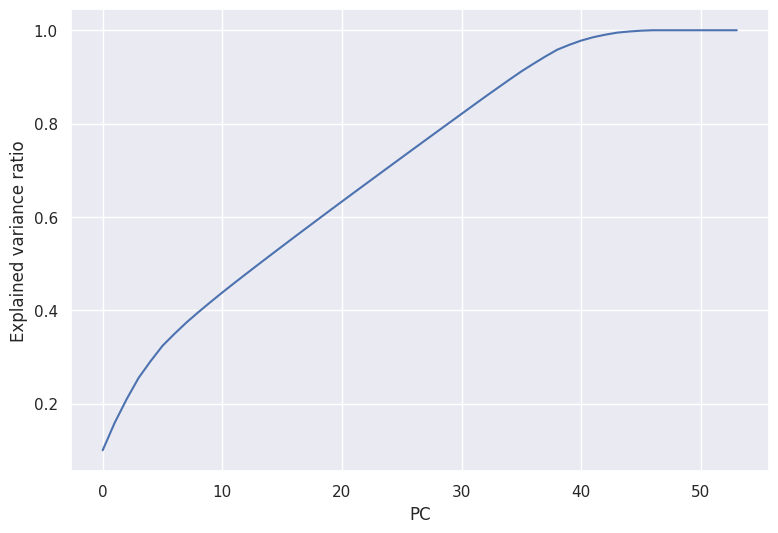

In [170]:
#list_comp = [35, 31, 28, 25, 21, 18] #указываем количество компонент
list_comp = [0.98, 0.90, 0.87, 0.83, 0.8, 0.75] #указываем размеры сохраняемой дисперсии

loss, rat = outlier_pca(
                        dataf = df_1,
                        list_comp = list_comp,
                        g = 100,
                        sort = 3,
                        plot = True
                        )

In [171]:
rat

[0.9850486201865125,
 0.9119659092134952,
 0.8762418738006953,
 0.8395847048597475,
 0.8023643212484652,
 0.7650363964030171]

In [172]:
loss

,loss_0.98,loss_0.9,loss_0.87,loss_0.83,loss_0.8,loss_0.75,count,ID
5908,22.730867,209.759463,209.799050,210.693615,210.745967,210.819397,6,5828_авито
6810,21.873807,123.980076,125.075353,125.847860,125.950915,NaN,5,6886_авито
535,19.768258,211.867558,212.314584,213.663664,213.803189,213.959792,6,1517_этажи
6871,18.276979,199.970583,199.993448,201.091084,201.141324,201.234020,6,6968_авито
7268,18.263929,200.273392,200.293477,201.378632,201.427326,201.516778,6,7446_авито
1231,17.780728,205.882606,206.280113,207.677157,207.810953,207.967885,6,3515_этажи
4155,17.082900,119.671004,120.757080,121.468570,121.570630,NaN,5,3426_авито
2839,9.461624,111.682346,111.928060,112.391971,NaN,NaN,4,1787_авито
3468,9.162088,111.400182,112.527180,113.155878,NaN,NaN,4,2620_авито
